In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if(pd.notna(skills)) else skills)

In [2]:
df_US = df[df['job_country'] == 'United States']
df_skills = df_US.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [3]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [4]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='Job Count')
df_perc = pd.merge(df_skills_count,df_job_title_count,on='job_title_short',how='left')
df_perc['Percentage']=df_perc['skill_count']/df_perc['Job Count']*100
df_perc

,job_skills,job_title_short,skill_count,Job Count,Percentage
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


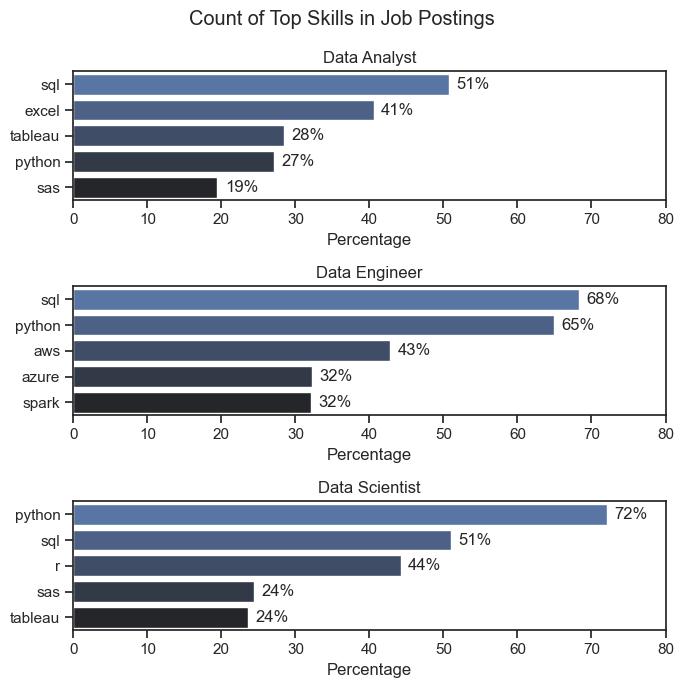

In [12]:
jobs = df_US['job_title_short'].unique().tolist()
jobs = sorted(jobs[1:4])

fig,ax = plt.subplots(3,1)
sns.set_theme(style='ticks')

for i, job in enumerate(jobs):
    df_plot = df_perc[df_perc['job_title_short'] == job].head(5)
    sns.barplot(data=df_plot, x='Percentage', y='job_skills',ax=ax[i], hue='job_skills', palette='dark:b_r')
    ax[i].set_title(job)
    ax[i].set_ylabel('') 
    ax[i].set_xlim(0,80)

    for n,val in enumerate(df_plot['Percentage']):
        ax[i].text(val+1,n,f'{val:.0f}%', va='center')

fig.suptitle('Count of Top Skills in Job Postings')
fig.set_size_inches((7,7))
fig.tight_layout()